# 비장하게 앞으로 나아가는 듯한, 결의를 다지게 하고, 자아를 말하는 것 같은 곡

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
import librosa.display
import sklearn
import csv
hop_length=200

In [6]:
"""
sound = AudioSegment.from_mp3("beinggoodisntgoodenough.mp3")
sound.export("beinggoodisntgoodenough.wav", format="wav")
sound = AudioSegment.from_mp3("guerilla.mp3")
sound.export("guerilla.wav", format="wav")
sound = AudioSegment.from_mp3("imthegreateststar.mp3")
sound.export("imthegreaeststar.wav", format="wav")
sound = AudioSegment.from_mp3("letmelive.mp3")
sound.export("letmelive.wav", format="wav")
sound = AudioSegment.from_mp3("nottoday.mp3")
sound.export("nottoday.wav", format="wav")
sound = AudioSegment.from_mp3("run.mp3")
sound.export("run.wav", format="wav")
sound = AudioSegment.from_mp3("theboys.mp3")
sound.export("theboys.wav", format="wav")
sound = AudioSegment.from_mp3("thefinalcountdown.mp3")
sound.export("thefinalcountdown.wav", format="wav")
sound = AudioSegment.from_mp3("thisisme.mp3")
sound.export("thisisme.wav", format="wav")
sound = AudioSegment.from_mp3("guerilla_inst.mp3")
sound.export("guerilla_inst.wav", format="wav")
sound = AudioSegment.from_mp3("nottoday_inst.mp3")
sound.export("nottoday_inst.wav", format="wav")
sound = AudioSegment.from_mp3("theboys_inst.mp3")
sound.export("theboys_inst.wav", format="wav")
sound = AudioSegment.from_mp3("thisisme_inst.mp3")
sound.export("thisisme_inst.wav", format="wav")
sound = AudioSegment.from_mp3("runnin_inst.mp3")
sound.export("runnin_inst.wav", format="wav")
sound = AudioSegment.from_mp3("runnin.mp3")
sound.export("runnin.wav", format="wav")
sound = AudioSegment.from_mp3("on1.mp3")
sound.export("on1.wav", format="wav")
sound = AudioSegment.from_mp3("adios.mp3")
sound.export("adios.wav", format="wav")
sound = AudioSegment.from_mp3("idol.mp3")
sound.export("idol.wav", format="wav")
sound = AudioSegment.from_mp3("lion.mp3")
sound.export("lion.wav", format="wav")
sound = AudioSegment.from_mp3("timegoeson.mp3")
sound.export("tgo.wav", format="wav")
sound = AudioSegment.from_mp3("bgige2.mp3")
sound.export("bgige2.wav", format="wav")
sound = AudioSegment.from_mp3("itgs2.mp3")
sound.export("itgs2.wav", format="wav")
"""
sound = AudioSegment.from_mp3("mih.mp3")
sound.export("mih.wav", format="wav")

<_io.BufferedRandom name='mih.wav'>

In [8]:
# offset=0.213(잡음 없고 완전 오리지널 시작 부분)
adios, sr = librosa.load('adios.wav', sr=44100, offset=60.648, duration=7.869) #68.517
bgige1, sr = librosa.load('bgige2.wav', sr=44100, offset=117.928, duration=17.677) #135.605
bgige2, sr = librosa.load('bgige2.wav', sr=44100, offset=153.385, duration=29.59)#182.975
gue1, sr = librosa.load('guerilla.wav', sr=44100, offset=0.629, duration=7.171) #7.8
gue2, sr = librosa.load('guerilla.wav', sr=44100, offset=7.8, duration=16.609) #24.409
gue3, sr = librosa.load('guerilla.wav', sr=44100, offset=39.769, duration=15.936) #55.705
gue4, sr = librosa.load('guerilla.wav', sr=44100, offset=64.51, duration=12.117) #76.627
idol1, sr = librosa.load('idol.wav', sr=44100, offset=0.17, duration=3.808) #3.978
itgs1, sr = librosa.load('itgs2.wav', sr=44100, offset=230.503, duration=13.139) # 243.642
#itgs2, sr = librosa.load('itgs2.wav', sr=44100, offset=, duration=) # 
#lml, sr = librosa.load('letmelive.wav', sr=44100, offset=, duration=)x
lion1, sr = librosa.load('lion.wav', sr=44100, offset=38.599, duration=8.651) #47.25
lion2, sr = librosa.load('lion.wav', sr=44100, offset=56.01, duration=19.483) # 75.493
lion3, sr = librosa.load('lion.wav', sr=44100, offset=94.288, duration=16.111) # 110.399
mih1, sr = librosa.load('mih.wav', sr=44100, offset=83.173, duration=11.691) # 94.864
ntd, sr = librosa.load('nottoday_inst.wav', sr=44100, offset=70.068, duration=4.401)
on, sr = librosa.load('on1.wav', sr=44100, offset=73.147, duration=13.813) # 86.96
run, sr = librosa.load('run.wav', sr=44100, offset=36.344, duration=25.21) # 61.554
runnin, sr = librosa.load('runnin.wav', sr=44100, offset=42.302, duration=21.973) # 64.275
tgo, sr = librosa.load('tgo.wav', sr=44100, offset=0.16, duration=5.813) # 5.973
boys, sr = librosa.load('theboys_inst.wav', sr=44100, offset=41.362, duration=1.873)
tfc, sr = librosa.load('thefinalcountdown.wav', sr=44100, offset=53.666, duration=8.053)#61.719
tim, sr = librosa.load('thisisme_inst.wav', sr=44100, offset=151.654, duration=14.966)

In [12]:
def vector_split(v, n_split):
    v=np.array(v)
    length=len(v)//n_split
    res=[]
    for i in range(n_split-1):
        res.append(v[i*length:(i+1)*length])
    res.append(v[(i+1)*length:])
    return np.array(res)

def split_mean(v, n_split):
    splitted_vector=vector_split(v, n_split)
    res=[]
    for i in splitted_vector:
        res.append(i.mean())
    return np.array(res)

def mfccs(songname):
    """
    mfccs = librosa.feature.mfcc(songname, sr=44100, n_mfcc=10)
    mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    """
    mfccs = librosa.feature.mfcc(songname, sr=44100, n_mfcc=20)
    mfccs = split_mean(mfccs, 10)
    return list(mfccs)

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

def centroid(songname):
    song_sc = normalize(librosa.feature.spectral_centroid(songname,sr=sr)[0])
    #frames = range(len(song_sc))
    #t = librosa.frames_to_time(frames)
    song_sc_data = split_mean(song_sc,10)
    return list(song_sc_data)
    """
    # normalize for visualization purposes
    librosa.display.waveplot(songname,sr=sr,alpha=0.4)
    plt.plot(t,song_sc,color='r')
    """

def mel(songname):
    name_stft = np.abs(librosa.stft(songname))
    name_mel = librosa.feature.melspectrogram(S=name_stft**2)
    """
    librosa.display.specshow(librosa.amplitude_to_db(name_mel), x_axis='time', y_axis='log')
    plt.colorbar()
    """
    new = librosa.amplitude_to_db(name_mel)
    new = split_mean(new, 10)
    return list(new)

def contrast(songname):
    name_cont = librosa.feature.spectral_contrast(songname, sr=sr)
    #plt.imshow(normalize(name_cont, axis=1), aspect='auto', origin='lower', cmap='coolwarm')
    name_cont_data = split_mean(name_cont,7)
    return list(name_cont_data)
"""
def novelty(songname):
    name_onset_env = librosa.onset.onset_strength(songname, sr=sr, hop_length=200, n_fft=2048)
    # Plot the onset envelope
    frames = range(len(name_onset_env))
    name_t = librosa.frames_to_time(frames, sr=sr, hop_length=200)
    plt.plot(name_t, name_onset_env)
    plt.xlim(0, name_t.max())
    plt.ylim(0)
    plt.xlabel('Time (sec)')
    plt.title('Novelty Function')
    return name_onset_env
"""

def tempogram(songname):
    onset_env = librosa.onset.onset_strength(songname, sr=sr, hop_length=200, n_fft=2048)
    name_S = librosa.stft(onset_env, hop_length=1, n_fft=512)
    name_fourier_tempogram = np.absolute(name_S)
    # librosa.display.specshow(name_fourier_tempogram, sr=sr, hop_length=hop_length, x_axis='time')
    name_ft_data = split_mean(name_fourier_tempogram,10)
    return list(name_ft_data)


def writefile(songlist):
    with open("heroic.csv", 'w', newline='') as f:
        w = csv.writer(f)
        for song in songlist:
            temp = ['heroic']
            temp.extend(mfccs(song))
            temp.extend(mel(song))
            temp.extend(centroid(song))
            temp.extend(contrast(song))
            temp.extend(tempogram(song))
            w.writerow(temp)


songlist = [adios,bgige1,bgige2,gue1,gue2,gue3,gue4,idol1,itgs1,lion1,lion2,lion3,mih1,ntd,on,run,runnin,tgo,boys,tfc,tim]
writefile(songlist)

## 1) Spectral features
### (1) MFCC

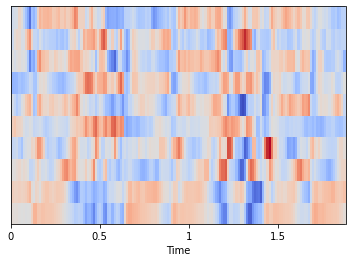

In [24]:
mfccs = librosa.feature.mfcc(boys, sr=44100, n_mfcc=10)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

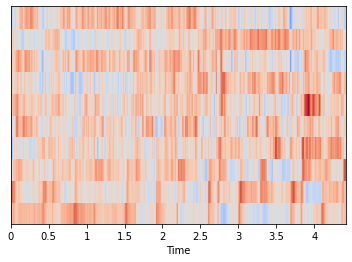

In [25]:
mfccs = librosa.feature.mfcc(ntd, sr=44100, n_mfcc=10)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

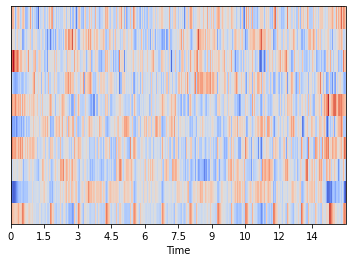

In [26]:
mfccs = librosa.feature.mfcc(tim, sr=44100, n_mfcc=10)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [5]:
"""
mfccs = librosa.feature.mfcc(boys, sr=44100, n_mfcc=10)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
"""
mfccs = librosa.feature.mfcc(boys, sr=44100, n_mfcc=20)
mfccs = split_mean(mfccs, 10)
print(mfccs)
mfccs = librosa.feature.mfcc(ntd, sr=44100, n_mfcc=20)
mfccs = split_mean(mfccs, 10)
print(mfccs)
mfccs = librosa.feature.mfcc(tim, sr=44100, n_mfcc=20)
mfccs = split_mean(mfccs, 10)
print(mfccs)

[-5.301206   5.3021555 15.313166   6.613401   6.844312   6.4954586
  6.2011456  3.596714   3.8265302  4.785734 ]
[19.601637   2.1949964 10.055941   9.884798   5.896738   6.3276753
  6.0124273  3.926379   4.6140842  4.529092 ]
[42.80902    2.9000666  8.890535   9.464255   5.525246   7.9698415
  3.9363146  1.1065136 -2.4133773 -2.0497143]


### (2) spectral centroid

In [6]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

[0.3841858240190426, 0.3665240059228401, 0.26973073607933795, 0.31232488700871053, 0.2467415966310341, 0.34154527173798294, 0.30771656438069916, 0.5581617779843783, 0.4174435540522026, 0.3394044903546539]


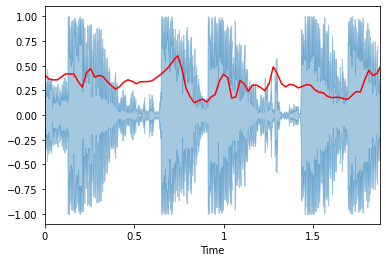

In [27]:
boys_sc = normalize(librosa.feature.spectral_centroid(boys,sr=sr)[0])
frames = range(len(boys_sc))
t = librosa.frames_to_time(frames)

boys_sc_data = split_mean(boys_sc,10)
print(list(boys_sc_data))
# normalize for visualization purposes
librosa.display.waveplot(boys,sr=sr,alpha=0.4)
plt.plot(t,boys_sc,color='r')

[0.623832149953364, 0.6472347385497056, 0.6896116475293146, 0.6484101082107783, 0.6180618513873233, 0.5163772198255454, 0.4603798466228195, 0.3311038197152924, 0.5144734497098229, 0.6192382630046314]


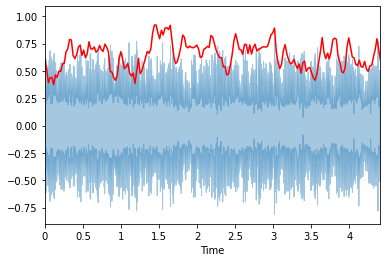

In [28]:
ntd_sc = normalize(librosa.feature.spectral_centroid(ntd,sr=sr)[0])
frames = range(len(ntd_sc))
t = librosa.frames_to_time(frames)

ntd_sc_data = split_mean(ntd_sc,10)
print(list(ntd_sc_data))
# normalize for visualization purposes
librosa.display.waveplot(ntd,sr=sr,alpha=0.4)
plt.plot(t,ntd_sc,color='r')

[0.4639855064941202, 0.22222400766446443, 0.24924760889771724, 0.2421087194678304, 0.24882576095013523, 0.24804467593933785, 0.24693444547017465, 0.24746212840965576, 0.26612357953354415, 0.39710314846791656]


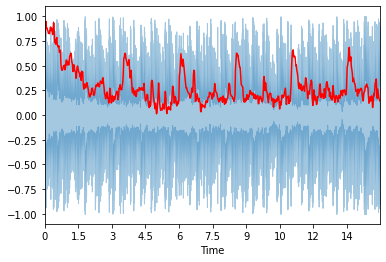

In [29]:
tim_sc = normalize(librosa.feature.spectral_centroid(tim,sr=sr)[0])
frames = range(len(tim_sc))
t = librosa.frames_to_time(frames)

tim_sc_data = split_mean(tim_sc,10)
print(list(tim_sc_data))
# normalize for visualization purposes
librosa.display.waveplot(tim,sr=sr,alpha=0.4)
plt.plot(t,tim_sc,color='r')

### (3) spectral roll-off

In [10]:
spectral_rolloff = normalize(librosa.feature.spectral_rolloff(boys+0.01, sr=sr)[0])
print(spectral_rolloff.mean())
spectral_rolloff = normalize(librosa.feature.spectral_rolloff(ntd+0.01, sr=sr)[0])
print(spectral_rolloff.mean())
spectral_rolloff = normalize(librosa.feature.spectral_rolloff(tim+0.01, sr=sr)[0])
print(spectral_rolloff.mean())

0.5806394062656104
0.5962837837837838
0.3680347986683191


### (4) Mel-spectrogram

[19.513678, 10.342657, 9.088913, 8.817123, 5.1251974, 3.343325, 1.1168363, -0.27980807, -1.4659302, -2.0797825]


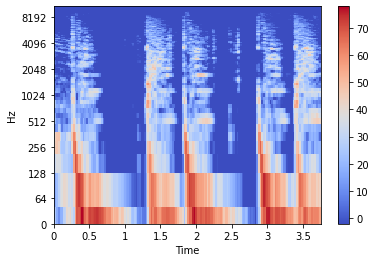

In [11]:
boys_stft = np.abs(librosa.stft(boys))
boys_mel = librosa.feature.melspectrogram(S=boys_stft**2)
librosa.display.specshow(librosa.amplitude_to_db(boys_mel), x_axis='time', y_axis='log')
plt.colorbar()

new1 = librosa.amplitude_to_db(boys_mel)
new1 = split_mean(new1, 10)
print(list(new1))

[16.790636, 4.1171446, 8.1303, 5.458125, 4.9408135, 4.393424, 2.2462502, -3.8878329, -9.225887, -9.95608]


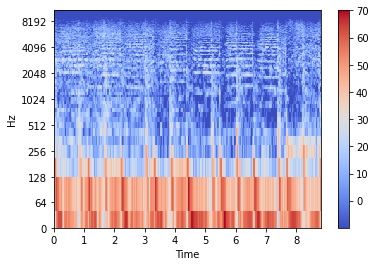

In [12]:
ntd_stft = np.abs(librosa.stft(ntd))
ntd_mel = librosa.feature.melspectrogram(S=ntd_stft**2)
librosa.display.specshow(librosa.amplitude_to_db(ntd_mel), x_axis='time', y_axis='log')
plt.colorbar()

new2 = librosa.amplitude_to_db(ntd_mel)
new2 = split_mean(new2, 10)
print(list(new2))

[29.76464, 14.983995, 11.425481, 5.5472655, 1.2394584, -1.0379627, -4.104723, -5.388524, -6.37587, -6.49343]


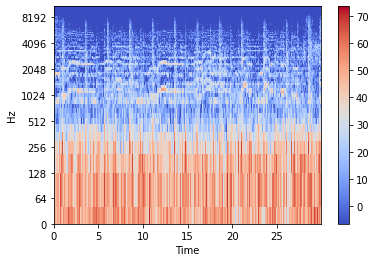

In [13]:
tim_stft = np.abs(librosa.stft(tim))
tim_mel = librosa.feature.melspectrogram(S=tim_stft**2)
librosa.display.specshow(librosa.amplitude_to_db(tim_mel), x_axis='time', y_axis='log')
plt.colorbar()

new3 = librosa.amplitude_to_db(tim_mel)
new3 = split_mean(new3, 10)
print(list(new3))

### (5) Spectral Contrast

[16.67351397673706, 9.627570573114863, 12.571688363465949, 13.782833650300654, 14.453763317676094, 15.355078592890472, 40.55174806299177]


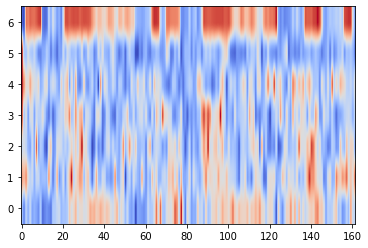

In [30]:
boys_cont = librosa.feature.spectral_contrast(boys, sr=sr)
plt.imshow(normalize(boys_cont, axis=1), aspect='auto', origin='lower', cmap='coolwarm')
boys_cont_data = split_mean(boys_cont,7)
print(list(boys_cont_data))

[17.19386763520792, 9.196948828349116, 11.021868137205493, 14.1101381857172, 14.785069686087919, 14.635480259053006, 52.634438175802046]


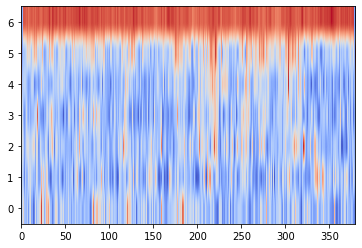

In [31]:
ntd_cont = librosa.feature.spectral_contrast(ntd, sr=sr)
plt.imshow(normalize(ntd_cont, axis=1), aspect='auto', origin='lower', cmap='coolwarm')
ntd_cont_data = split_mean(ntd_cont,7)
print(list(ntd_cont_data))

[12.547557551656666, 9.74081026665022, 12.410639181889316, 15.511377392541316, 15.331176321678255, 16.28862221516536, 44.8176423805644]


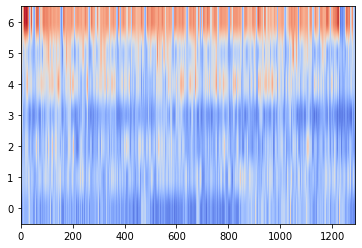

In [32]:
tim_cont = librosa.feature.spectral_contrast(tim, sr=sr)
plt.imshow(normalize(tim_cont, axis=1), aspect='auto', origin='lower', cmap='coolwarm')
tim_cont_data = split_mean(tim_cont,7)
print(list(tim_cont_data))

## 2) Tempo Features(Tempogram)
### (1) Global Tempo

In [14]:
# 인자값 좀 조정하기
tempo = librosa.beat.tempo(ntd, sr=sr)
print(tempo)
tempo = librosa.beat.tempo(boys, sr=sr)
print(tempo)
tempo = librosa.beat.tempo(tim, sr=sr)
print(tempo)

[143.5546875]
[129.19921875]
[129.19921875]


### (2) Novelty Function

Text(0.5, 1.0, 'Novelty Function')

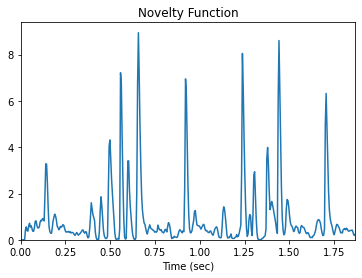

In [15]:
boys_onset_env = librosa.onset.onset_strength(boys, sr=sr, hop_length=200, n_fft=2048)
# Plot the onset envelope
frames = range(len(boys_onset_env))
boys_t = librosa.frames_to_time(frames, sr=sr, hop_length=200)
plt.plot(boys_t, boys_onset_env)
plt.xlim(0, boys_t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

Text(0.5, 1.0, 'Novelty Function')

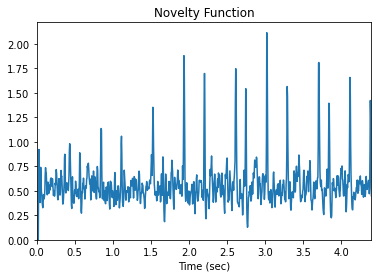

In [16]:
ntd_onset_env = librosa.onset.onset_strength(ntd, sr=sr, hop_length=200, n_fft=2048)
# Plot the onset envelope
frames = range(len(ntd_onset_env))
ntd_t = librosa.frames_to_time(frames, sr=sr, hop_length=200)
plt.plot(ntd_t, ntd_onset_env)
plt.xlim(0, ntd_t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

Text(0.5, 1.0, 'Novelty Function')

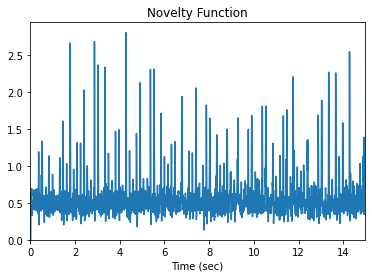

In [17]:
tim_onset_env = librosa.onset.onset_strength(tim, sr=sr, hop_length=200, n_fft=2048)
# Plot the onset envelope
frames = range(len(tim_onset_env))
tim_t = librosa.frames_to_time(frames, sr=sr, hop_length=200)
plt.plot(tim_t, tim_onset_env)
plt.xlim(0, tim_t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

### (3) Fourier Tempogram

[44.361805, 33.763954, 23.536087, 12.250569, 10.904681, 6.177038, 4.679789, 3.7799242, 2.9361663, 2.5459929]


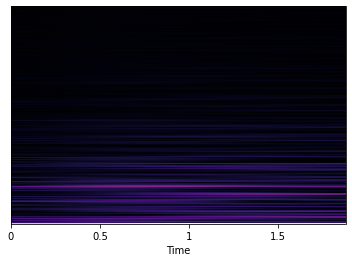

In [35]:
boys_S = librosa.stft(boys_onset_env, hop_length=1, n_fft=512)
boys_fourier_tempogram = np.absolute(boys_S)
librosa.display.specshow(boys_fourier_tempogram, sr=sr, hop_length=hop_length, x_axis='time')
boys_ft_data = split_mean(boys_fourier_tempogram,10)
print(list(boys_ft_data))

[13.1108055, 4.4165955, 4.044202, 2.5808005, 1.8533792, 0.93893456, 0.6742708, 0.46719393, 0.35707268, 0.3240202]


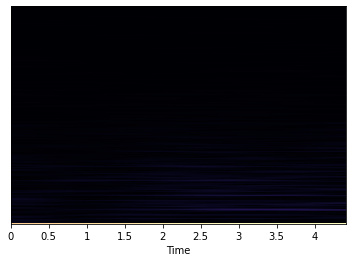

In [36]:
ntd_S = librosa.stft(ntd_onset_env, hop_length=1, n_fft=512)
ntd_fourier_tempogram = np.absolute(ntd_S)
librosa.display.specshow(ntd_fourier_tempogram, sr=sr, hop_length=hop_length, x_axis='time')
ntd_ft_data = split_mean(ntd_fourier_tempogram,10)
print(list(ntd_ft_data))

[15.072773, 6.297497, 4.296375, 2.5687454, 1.5449319, 0.90746546, 0.62173635, 0.5027708, 0.38138074, 0.30842707]


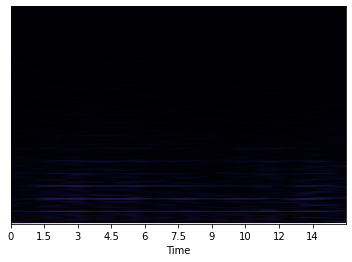

In [37]:
tim_S = librosa.stft(tim_onset_env, hop_length=1, n_fft=512)
tim_fourier_tempogram = np.absolute(tim_S)
librosa.display.specshow(tim_fourier_tempogram, sr=sr, hop_length=hop_length, x_axis='time')
tim_ft_data = split_mean(tim_fourier_tempogram,10)
print(list(tim_ft_data))